# PAUTA LABORATORIO 1 SIMULACIÓN


### CONTENIDOS
- Ejemplo del lanzamiento de monedas
- Conceptos: Espacio muestral, evento, probabilidad
- Principios de probabilidad y propiedades


### ¿Cómo asignamos valores de probabilidad?

- $\textbf{Enfoque frecuentista relativo o de simulación:}$ Sea $n$ el número de experimentos, y $n(A)$ el número de veces que el evento $A$ ocurre en la realización de esos experimentos, entonces $P(A) = \frac{n(A)}{n}$

- $\textbf{Enfoque frecuentista clásico:}$ Sea $n(A)$ el número elementos en el evento $A$, y $n(\Omega)$ el número de elementos en el espacio muestral $\Omega$, entonce $P(A) = \frac{n(A)}{n(\Omega)}$

- $\textbf{Enfoque Bayesiano:}$ Yo pienso que la probabilidad de que me gane un proyecto es $0.9$ (probabilidad a priori).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Lanzamiento de monedas

In [4]:
# Define algunos parámetros del contexto de trabajo
sns.set_context("notebook", 
                font_scale=1.5, 
                rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')
# Crea dic variables de color que serán usadas en este contexto
rojo= sns.xkcd_rgb['vermillion']
azul= sns.xkcd_rgb['dark sky blue']


In [5]:
#utilzaremos la distribución binomial para modelar el experimento del lanzamiento de una moneda n veces
def factorial(n):
    """Calcula factorial de `n`
    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calcula la combinatoria de n y k 
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Retorna la probabilidad de que ocurran `k` caras in `n` lanzamientos de una moneda
    
    Argumentos:
    
    n - número de ensayos
    k - número de ensayos en los que se obtiene cara
    p - probabilidad de que el evento "obtener cara" ocurra
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

def lanzaMoneda(N_caras, N_exper): 
    # Calcula la probabilidad de cada posible salida (N_caras) 
    # del experimento de lanzar N_exper veces una moneda equilibrada
    probabilidades = [binom_prob(N_exper, k, 0.5) for k in range(1, N_exper + 1)]
    #p_value es la probabilidad de que la salida sea mayor o igual que N_caras
    p_value = (np.sum(probabilidades[N_caras-1:]))
    # Grafica la distribución de probabilidad calculada
    plt.step(range(1, N_exper + 1), probabilidades, where='mid', color=azul)
    plt.xlabel('número de caras')
    plt.ylabel('probabilidad')
    plt.plot((N_caras, N_caras), (0, max(probabilidades)), color=rojo)
    
    porc = round((p_value)*100,3)
    plt.annotate( str(porc) + '%', 
                 xytext=(N_caras + 10, max(probabilidades)/2), 
                 xy=(N_caras, max(probabilidades)/2), 
                 multialignment='right',
                 va='center',
                 color=rojo,
#                  size='large',
                 arrowprops={'arrowstyle': '<|-', 
                             'lw': 1, 
                             'color': rojo, 
                             'shrinkA': 1})

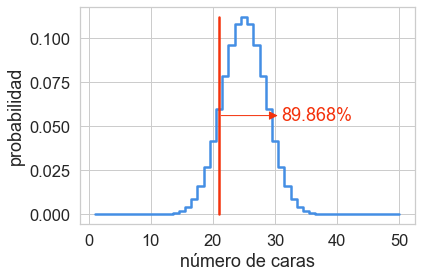

In [4]:
lanzaMoneda(21,50)


P-value simulado: 0.2%


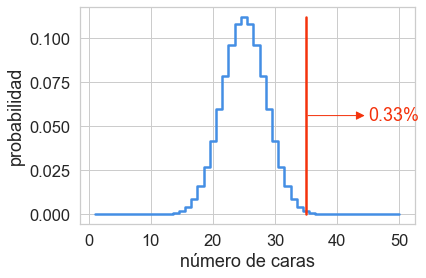

In [6]:
#Simularemos directamente el lanzamiento de la moneda considerando # valores aleatorios para el resultado de cada lanzamiento
M = 0
n = 1000  # cambie este valor.
N_caras = 35
N_exper = 50
for i in range(n):
    #genera N_exper valores aleatorios 0 o 1
    ensayos = np.random.randint(2, size=N_exper)
    if (ensayos.sum() >= N_caras):
        M += 1
p = M / n

print("P-value simulado: %0.1f%%" % (p * 100))
lanzaMoneda(N_caras,N_exper)

### Pregunta 1
i) Utilice distintos valores para N_caras y N_exper ¿Qué es el valor "p" en ambos casos?

ii) En el código de la simulación, considere valores crecientes de n ¿Desde qué cantidad la simulación reemplaza el análisis estadístico? Agregue código para graficar el comportamiento de convergencia de la simulación al valor obtenido utilizando la distribución binomial.

### Respuesta Pregunta 1
(i) p en este caso corresponde a la probabilidad de que resulten un número mayor o igual a N_caras en N_exper tiradas de una moneda. En el primer caso es el valor exacto proveniente de la distribución binomial. En el segundo caso es el valor aproximado de la probabilidad considerando n simulaciones del experimento.

(ii) Para los parámetros fijados (N_caras y N_exper) el valor de n es sobre 20000 para obtener una buena aproximación, de acuerdo a la gráfica siguiente

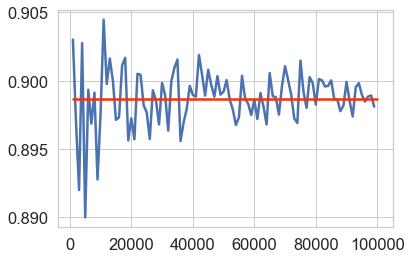

In [7]:

n = 1000  # cambie este valor.
N_caras = 21
N_exper = 50
probabilidades = [binom_prob(N_exper, k, 0.5) for k in range(1, N_exper + 1)]
p_value = (np.sum(probabilidades[N_caras-1:]))
vec = range(1000,100000,1000)
pvec = []
for n in vec:
    M = 0   
    for i in range(n):
        #genera N_exper valores aleatorios 0 o 1
        ensayos = np.random.randint(2, size=N_exper)
        if (ensayos.sum() >= N_caras):
            M += 1
    p = M / n
    pvec.append(p)
plt.plot(vec,pvec)
plt.plot((1000, 100000), (p_value, p_value), color=rojo)
plt.show()


### Pregunta 2 
En un certamen literario hay 3 premios: ganador, finalista y mención honrosa. Cada participante sólo puede obtener un premio. Si participan 12 personas en el certamen, se puede definir, el espacio muestral de los posibles resultados como:

${S = \{ \text{todas las formas de ordenar } (1,2,3,4,5,6,7,8,9,10,11,12) \}}$

En donde los números identifican a cada una de las 12 personas y  las primeras tres ubicaciones corresponden a los escritores premiados.

Sea ${A}$ el evento en que la persona #1 es ganador, el evento ${B}$ denota que la persona #2 no gana ningún premio, y el evento ${C}$ es que la persona #3 gana la mención honrosa.

Simule las probabilidades de los siguientes eventos y compare con los valores teóricos: 

(i) $A \cup B$ 

(ii) $A \cap B$

(iii) $A \cap B \cap C$

(iv) $A \cup (B\cap C)$


puede usar random.shuffle de la biblioteca random para generar permutaciones aleatorias de [1,2,...,12] 

In [11]:
import random
pAoB = 0
pAB = 0
pABC = 0
pAoBC =0

n = 1000000 # cambie este valor.
ensayo =[1,2,3,4,5,6,7,8,9,10,11,12]

for i in range(n):
    random.shuffle(ensayo)
    if ((ensayo[0] == 1) or ((ensayo[1]!=1) and (ensayo[1]!=2) and (ensayo[1]!=3))):
        pAoB +=1
    if ((ensayo[0] == 1) and ((ensayo[1]!=1) and (ensayo[1]!=2) and (ensayo[1]!=3))):
        pAB +=1
    if ((ensayo[0] == 1) and (ensayo[1]!=1) and (ensayo[1]!=2) and (ensayo[1]!=3) and (ensayo[2]==3)):
        pABC +=1
    if ((ensayo[0] == 1) or ((ensayo[1]!=1) and (ensayo[1]!=2) and (ensayo[1]!=3) and (ensayo[2]==3))):
        pAoBC +=1
        
pAoB = pAoB/n
pAB = pAB/n
pABC = pABC/n
pAoBC = pAoBC/n
print(factorial(12))
print(' P(AUB) = ',pAoB,' P(AB) = ',pAB,' P(ABC) = ',pABC,' P(AU(BC)) = ',pAoBC)



479001600
 P(AUB) =  0.764955  P(AB) =  0.067901  P(ABC) =  0.00679  P(AU(BC)) =  0.144415


Teóricamente se tiene:


$\begin{equation}
\begin{array}{lll}
P(A\cap B) & = & P(B) P(A \mid B) = \frac{9}{12} \frac{1}{11} = 0.06818\\
P(A \cup B) & = &P(A) + P(B) - P(A\cap B) = \frac{1}{12} + \frac{9}{12} - 0.06818 = 0.7651\\
P(A\cap B \cap C)& = & P(C)P(B \mid C) P(A \mid B\cap C)= \frac{1}{12} \frac{9}{11} \frac{1}{10} = 0.0068\\
P(A \cup (B\cap C)) & = & P(A) + P(B\cap C) - P(A\cap B \cap C) \\
& = & P(A) + P(B) P(C \mid B) - P(A\cap B \cap C)= \frac{1}{12} + \frac{9}{12}\frac{1}{11}- 0.0068 = 0.1447\\
\end{array}
\end{equation}$\\


por lo que la simulación aproxima muy bien las probabilidades calculadas.

### Pregunta 3

(i)  Demuestre (b) y (c) en la propiedad de Independencia.

(ii) Demuestre el Teorema de las Probabiliades totales.

### Respuesta Pregunta 3

(i) **Propiedad (b) independencia**:  Si $A$ y $B$ independientes entonces $A$ y $B^C$ independientes

Por Demostrar: $$P(A\cap B^C) = P(A)P(B^C)$$

Demostración:  Por propiedades de conjuntos:
$$ A = A \cap \Omega = A \cap (B \displaystyle\dot\cup B^C)  = (A\cap B) \displaystyle\dot\cup (A \cap B^C)$$
entonces por propiedad de independencia de $A$ y $B$
$$P(A) = P(A\cap B) + P(A \cap B^C) = P(A)P(B) + P(A \cap B^C)$$
de manera que:
$$P(A \cap B^C) = P(A)(1-P(B)) = P(A)P(B^C)$$

**Propiedad (c) independencia**:  Si $A$ y $B$ independientes entonces $A^C$ y $B^C$ independientes

Por Demostrar: $$P(A^C\cap B^C) = P(A^C)P(B^C)$$
Demostración:  Por propiedades de conjuntos:
$$ A^C = A^C \cap \Omega = A^C \cap (B \displaystyle\dot\cup B^C)  = (A^C\cap B) \displaystyle\dot\cup (A^C \cap B^C)$$
entonces, por propiedad (a) de independencia:
$$P(A^C) = P(A^C\cap B) + P(A^C \cap B^C) = P(A^C)P(B) + P(A^C \cap B^C)$$
de manera que:
$$P(A^C \cap B^C) = P(A^C)(1-P(B)) = P(A^C)P(B^C)$$

(ii) **Demostración del Teorema de Probabilidades Totales**

Puesto que  $\{B_i\}_{i=1,..n}$ forman una partición de $\Omega$, por definición se tiene:
\begin{equation*}
\begin{array}{lll}
\bigcup_{i=1}^n \limits  B_i = \Omega, & & B_i\cap B_j = \phi \qquad \forall i,j=1,..n, i\neq j
\end{array}\end{equation*}

De manera que  $\{A\cap B_i\}_{i=1,..n}$ es una familia de conjuntos disjuntos, entonces:
$$ P(A) = P(A \cap \Omega) = P(A \cap (\displaystyle\dot\cup B_i)) = P (\displaystyle\dot\cup (A\cap B_i)) = \sum_{i=1}^n P(A\cap B_i)$$

Finalmente, de la definición de probabilidad condicional, se tiene que $(P(A\cap B_i) = P( A \mid B_i) P(B_i)$ de donde el resultado.

# Referencias
1. https://github.com/croach/statistics-for-hackers/blob/master/statistics-for-hackers.ipynb
2. Ross, S. M. (2006). Simulation. Elsevier.